<a href="https://colab.research.google.com/github/adarsh-kumar-shah/Heart_Health_Analysis/blob/main/heart_health_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/heart.csv")

In [ ]:
print(df.head())
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [ ]:
#Checking for missing value

print("\nMissing values check:")
print(df.isnull().sum())


Missing values check:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Outlier detection for 'trestbps', 'chol', 'thalach', 'oldpeak'
numerical_cols = ['trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Capping outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

In [ ]:
# Standardization (Z-score scaling)
scaler = StandardScaler()
data_scaled = df.copy()
data_scaled[numerical_cols + ['age']] = scaler.fit_transform(df[numerical_cols + ['age']])

**Basic Level Question**
1. Average age

In [ ]:
df['age'].mean()

np.float64(54.43414634146342)

2. Gender distribution

In [ ]:
df['sex'].value_counts()

,count
sex,
1,713
0,312


3. Average resting blood pressure

In [ ]:
df['trestbps'].mean()

np.float64(131.26048780487804)

4. Patients with high FBS (> 120)

In [ ]:
df['fbs'].sum()

np.int64(153)

5. Different types of chest pain (cp)

In [ ]:
df['cp'].unique()

array([0, 1, 2, 3])

6. Maximum heart rate (thalach)

In [ ]:
df['thalach'].max()

202.0

7. % with exercise-induced angina (exang)

In [ ]:
(df['exang'].mean() * 100).round(2)

np.float64(33.66)

8. Average cholesterol (chol)

In [ ]:
df['chol'].mean()

np.float64(244.98146341463413)

9. Patients with restecg = 2

In [ ]:
df['restecg'].value_counts().get(2, 0)

np.int64(15)

10. Distribution of major vessels (ca)

In [ ]:
df['ca'].value_counts()

,count
ca,
0,578
1,226
2,134
3,69
4,18


**Medium Level Question**
1. Correlation between Age and Cholesterol

In [ ]:
correlation = df[['age', 'chol']].corr().iloc[0, 1]
print(f"Correlation between age and cholesterol: {correlation:.2f}")

Correlation between age and cholesterol: 0.21


2. Distribution of Chest Pain Types across Age Groups

<Figure size 1000x600 with 0 Axes>

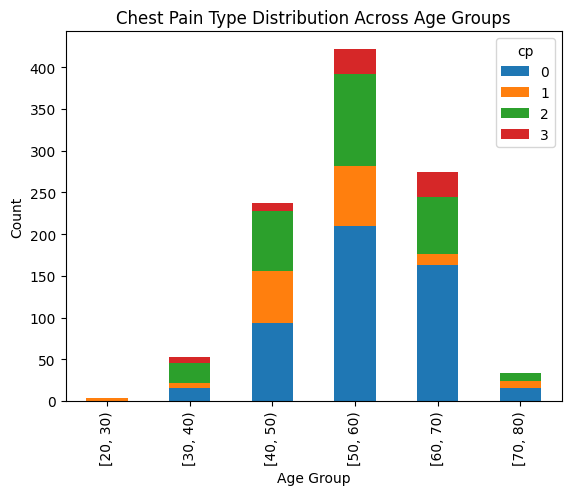

In [ ]:
age_bins = pd.cut(df['age'], bins=range(20, df['age'].max() + 10, 10), right=False)
cp_age_dist = pd.crosstab(age_bins, df['cp'])

plt.figure(figsize=(10, 6))
cp_age_dist.plot(kind='bar', stacked=True)
plt.title('Chest Pain Type Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

3. Max Heart Rate Variation with Exercise-Induced Angina (exang)

In [ ]:
thalach_by_exang = df.groupby('exang')['thalach'].mean()
print("Average Max Heart Rate (thalach) by Exercise-Induced Angina (0=No, 1=Yes):")
print(thalach_by_exang)

Average Max Heart Rate (thalach) by Exercise-Induced Angina (0=No, 1=Yes):
exang
0    155.401471
1    136.837681
Name: thalach, dtype: float64


4. Difference in Resting Blood Pressure (trestbps) between Genders (sex)

In [ ]:
bp_by_sex = df.groupby('sex')['trestbps'].mean()
print("Average Resting BP (trestbps) by Gender (0=Female, 1=Male):")
print(bp_by_sex)

female_bp = df[df['sex'] == 0]['trestbps']
male_bp = df[df['sex'] == 1]['trestbps']
t_stat, p_value = stats.ttest_ind(female_bp, male_bp, equal_var=False)

print(f"T-test P-value: {p_value:.4f} (A low P-value suggests a significant difference)")

Average Resting BP (trestbps) by Gender (0=Female, 1=Male):
sex
0    132.951923
1    130.520337
Name: trestbps, dtype: float64
T-test P-value: 0.0376 (A low P-value suggests a significant difference)


5. Relationship between Fasting Blood Sugar (fbs) and Heart Disease (target)

<Figure size 700x500 with 0 Axes>

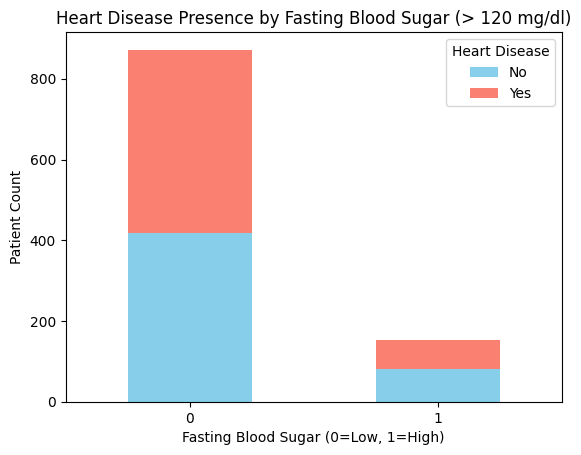

In [ ]:
fbs_target_crosstab = pd.crosstab(df['fbs'], df['target'])

plt.figure(figsize=(7, 5))
fbs_target_crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Heart Disease Presence by Fasting Blood Sugar (> 120 mg/dl)')
plt.xlabel('Fasting Blood Sugar (0=Low, 1=High)')
plt.ylabel('Patient Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

6. Impact of Number of Major Vessels (ca) on Heart Disease (target)

<Figure size 800x600 with 0 Axes>

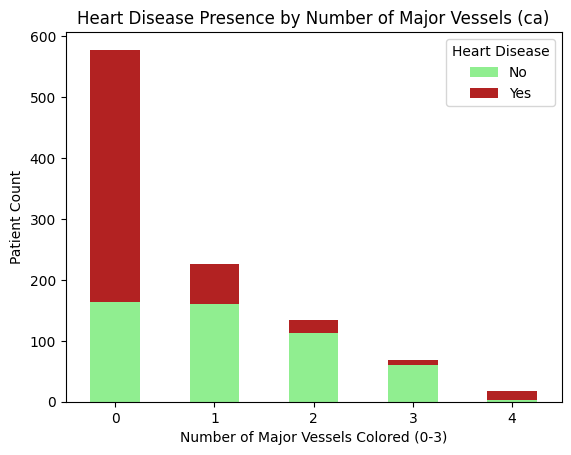

In [ ]:
ca_target_crosstab = pd.crosstab(df['ca'], df['target'])

plt.figure(figsize=(8, 6))
ca_target_crosstab.plot(kind='bar', stacked=True, color=['lightgreen', 'firebrick'])
plt.title('Heart Disease Presence by Number of Major Vessels (ca)')
plt.xlabel('Number of Major Vessels Colored (0-3)')
plt.ylabel('Patient Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

7. Average 'oldpeak' by Chest Pain Type (cp)

In [ ]:
oldpeak_by_cp = df.groupby('cp')['oldpeak'].mean()
print("Average 'oldpeak' by Chest Pain Type (cp):")
print(oldpeak_by_cp)

Average 'oldpeak' by Chest Pain Type (cp):
cp
0    1.419718
1    0.323952
2    0.784507
3    1.380519
Name: oldpeak, dtype: float64


8. Distribution of Thalassemia Types (thal) among Heart Disease Patients

<Figure size 800x600 with 0 Axes>

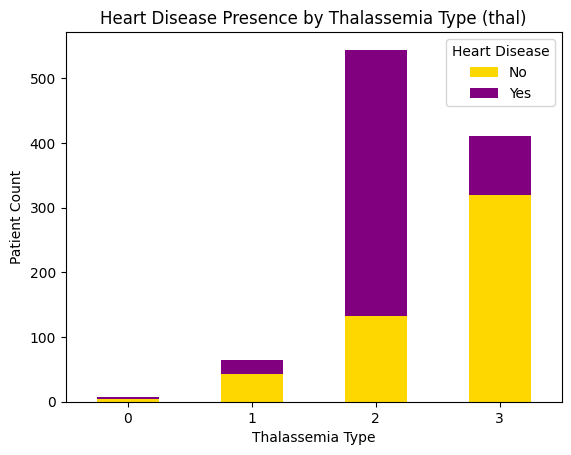

In [ ]:
thal_target_crosstab = pd.crosstab(df['thal'], df['target'])

plt.figure(figsize=(8, 6))
thal_target_crosstab.plot(kind='bar', stacked=True, color=['gold', 'purple'])
plt.title('Heart Disease Presence by Thalassemia Type (thal)')
plt.xlabel('Thalassemia Type')
plt.ylabel('Patient Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

9. Most Common Combinations of Risk Factors in Heart Disease Patients

In [ ]:
risk_factors = ['cp', 'fbs', 'exang', 'thal']
common_combos = df[df['target'] == 1].groupby(risk_factors).size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(5)
print("\nTop 5 Most Common Risk Factor Combinations in Heart Disease Patients:")
print(common_combos)


Top 5 Most Common Risk Factor Combinations in Heart Disease Patients:
    cp  fbs  exang  thal  counts
15   2    0      0     2     133
8    1    0      0     2      97
1    0    0      0     2      73
19   2    1      0     2      32
16   2    0      0     3      19


10. Pairwise Comparison of Clinical Measurements


Descriptive Statistics for Patients with Heart Disease (target=1):
              age    trestbps        chol     thalach     oldpeak
count  526.000000  526.000000  526.000000  526.000000  526.000000
mean    52.408745  129.131179  239.484791  158.585551    0.569962
std      9.631804   15.789686   46.803569   19.096928    0.771079
min     29.000000   94.000000  126.000000   96.000000    0.000000
25%     44.000000  120.000000  208.000000  149.000000    0.000000
50%     52.000000  130.000000  234.000000  161.500000    0.200000
75%     59.000000  140.000000  265.750000  172.000000    1.000000
max     76.000000  170.000000  371.000000  202.000000    4.200000

Descriptive Statistics for Patients without Heart Disease (target=0):
              age    trestbps        chol     thalach     oldpeak
count  499.000000  499.000000  499.000000  499.000000  499.000000
mean    56.569138  133.505010  250.775551  139.210421    1.581162
std      7.908153   17.009609   48.090295   22.339248    1.236301
min

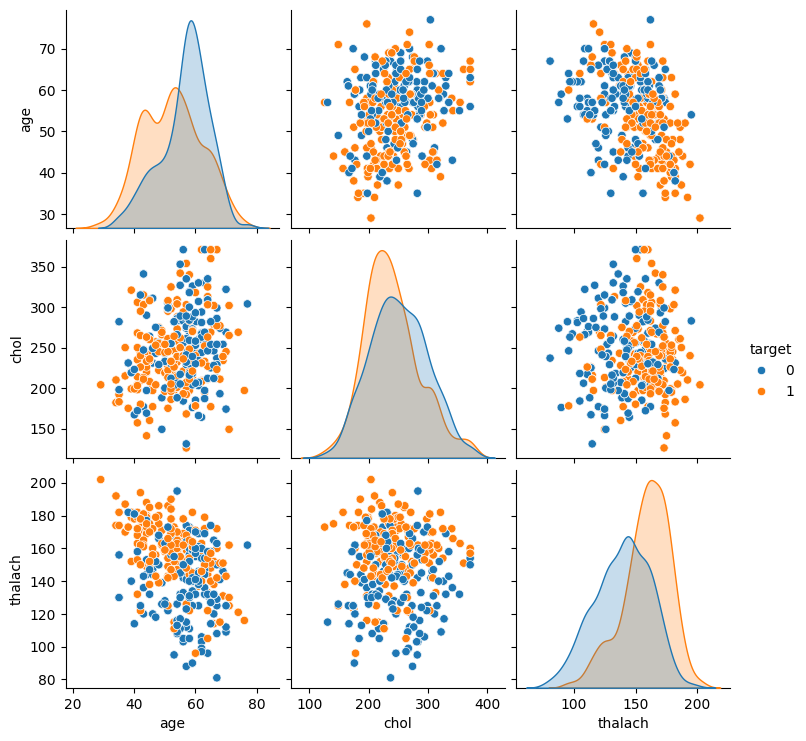

In [ ]:
clinical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
print("\nDescriptive Statistics for Patients with Heart Disease (target=1):")
print(df[df['target'] == 1][clinical_cols].describe())
print("\nDescriptive Statistics for Patients without Heart Disease (target=0):")
print(df[df['target'] == 0][clinical_cols].describe())

sns.pairplot(df, hue='target', vars=['age', 'chol', 'thalach'])
plt.show()

**Advance Level Question**
1. Effect of Combining Multiple Risk Factors (Visualization)

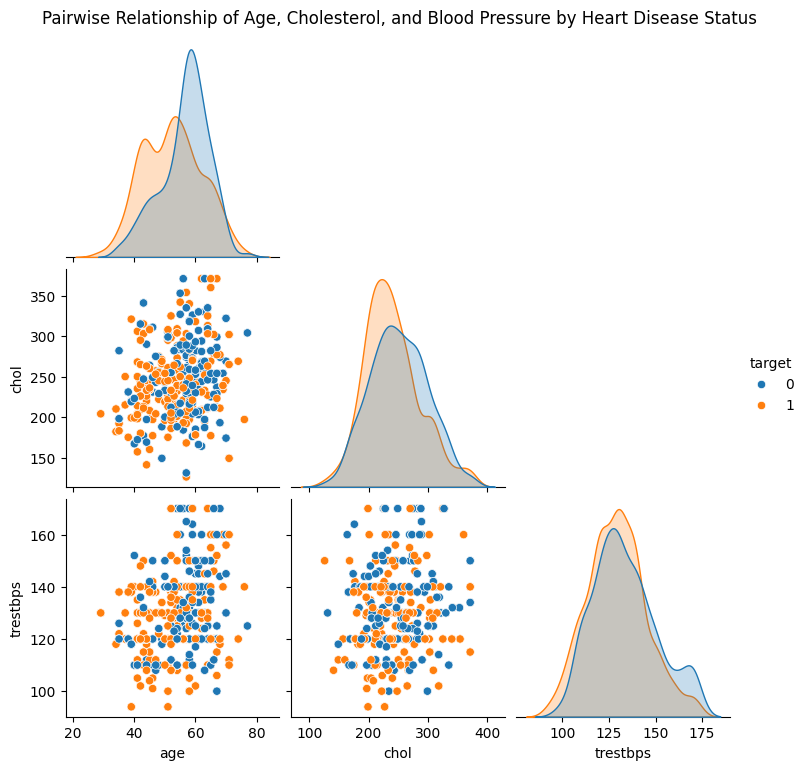

In [ ]:
sns.pairplot(df, hue='target', vars=['age', 'chol', 'trestbps'], corner=True)
plt.suptitle('Pairwise Relationship of Age, Cholesterol, and Blood Pressure by Heart Disease Status', y=1.02)
plt.show()

2. Strongest Correlation with Heart Disease (target)

In [ ]:
correlations = df.corr()['target'].sort_values(ascending=False)
strongest_predictor = correlations.drop('target').index[0]
strongest_corr_value = correlations.drop('target').iloc[0]

print("\nCorrelations with Target (Heart Disease Presence):")
print(correlations)
print(f"\nThe strongest individual predictor (correlation magnitude) is '{strongest_predictor}' with a correlation of {strongest_corr_value:.3f}.")


Correlations with Target (Heart Disease Presence):
target      1.000000
cp          0.434854
thalach     0.423445
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.118254
trestbps   -0.132301
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.442847
Name: target, dtype: float64

The strongest individual predictor (correlation magnitude) is 'cp' with a correlation of 0.435.


3. Logistic Regression Analysis for Prediction

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

feature_importance = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=False)

print("\nLogistic Regression Model Coefficients (Feature Importance):")
print(feature_importance)

accuracy = model.score(X_test, y_test)
print(f"\nModel Accuracy on Test Set: {accuracy:.4f}")


Logistic Regression Model Coefficients (Feature Importance):
cp          0.840076
slope       0.566170
restecg     0.322031
thalach     0.035931
age         0.015296
chol       -0.009674
trestbps   -0.014119
fbs        -0.211511
oldpeak    -0.649006
exang      -0.763119
ca         -0.815071
thal       -1.023524
sex        -1.630810
dtype: float64

Model Accuracy on Test Set: 0.8049


4. Variation of ST Segment Slope (slope) with Chest Pain Types (cp)

<Figure size 800x600 with 0 Axes>

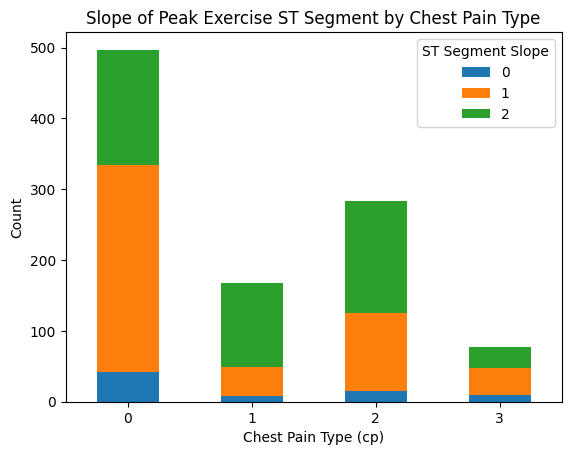

In [ ]:
slope_cp_dist = pd.crosstab(df['cp'], df['slope'])

plt.figure(figsize=(8, 6))
slope_cp_dist.plot(kind='bar', stacked=True)
plt.title('Slope of Peak Exercise ST Segment by Chest Pain Type')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.legend(title='ST Segment Slope')
plt.xticks(rotation=0)
plt.show()

5. Survival Rates Analysis (Proxy: Thalassemia vs. Age by Target)

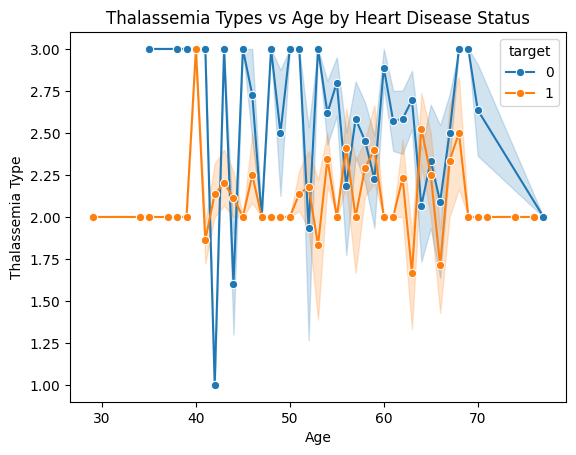

In [ ]:
sns.lineplot(x='age', y='thal', hue='target', data=df, marker="o")
plt.title("Thalassemia Types vs Age by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Thalassemia Type")
plt.show()